# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv('../data/interim/housing_data.csv')
df.head()

,available,living_space,lot_size,price,rooms,type,url,volume,year_built,commune,postal_code
0,by agreement,334.0,1568.0,1800000.0,7.5,Single house,https://www.homegate.ch/buy/108373430,2062.0,1967.0,Morrens VD,1054
1,by agreement,180.0,NaN,1900000.0,5.5,Villa,https://www.homegate.ch/buy/108429125,746.0,2005.0,Aran,1091
2,by agreement,294.0,4513.0,3500000.0,10.0,Single house,https://www.homegate.ch/buy/107768977,3469.0,1848.0,Assens,1042
3,by agreement,185.0,1143.0,1580000.0,7.5,Single house,https://www.homegate.ch/buy/108456208,NaN,1962.0,Belmont-sur-Lausanne,1092
4,by agreement,150.0,1006.0,1290000.0,6.5,Single house,https://www.homegate.ch/buy/106982982,NaN,1986.0,Belmont-sur-Lausanne,1092


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
available       287 non-null object
living_space    269 non-null float64
lot_size        236 non-null float64
price           257 non-null float64
rooms           266 non-null float64
type            287 non-null object
url             287 non-null object
volume          147 non-null float64
year_built      235 non-null float64
commune         287 non-null object
postal_code     287 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 24.7+ KB


So we have quite a lot of null values in the data. We do need the price to be set properly, so let's drop all entries that do not have a valid price associated to them.

In [3]:
df.dropna(subset=['price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 286
Data columns (total 11 columns):
available       257 non-null object
living_space    243 non-null float64
lot_size        210 non-null float64
price           257 non-null float64
rooms           240 non-null float64
type            257 non-null object
url             257 non-null object
volume          128 non-null float64
year_built      214 non-null float64
commune         257 non-null object
postal_code     257 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 24.1+ KB


There are still some null values for the other fields. Let's take a look at the properties without a living space defined.

In [4]:
df[df.living_space.isna()]

,available,living_space,lot_size,price,rooms,type,url,volume,year_built,commune,postal_code
9,by agreement,NaN,4513.0,3500000.0,NaN,Single house,https://www.homegate.ch/buy/107895163,3469.0,NaN,Assens,1042
29,by agreement,NaN,NaN,1310000.0,5.0,Bifamiliar house,https://www.homegate.ch/buy/107511732,760.0,2018.0,Bussigny,1030
35,by agreement,NaN,NaN,1029000.0,NaN,Villa,https://www.homegate.ch/buy/107617622,NaN,2018.0,Bussigny,1030
41,by agreement,NaN,NaN,1650000.0,7.5,Single house,https://www.homegate.ch/buy/108005348,NaN,NaN,Cossonay-Ville,1304
92,by agreement,NaN,NaN,3000000.0,NaN,Single house,https://www.homegate.ch/buy/105563689,NaN,NaN,Epesses,1098
94,immediately,NaN,2600.0,4700000.0,11.0,Single house,https://www.homegate.ch/buy/108398309,NaN,NaN,Epalinges,1066
103,by agreement,NaN,NaN,895000.0,4.5,Row house,https://www.homegate.ch/buy/108397502,497.0,1988.0,Grandvaux,1091
120,by agreement,NaN,NaN,2650000.0,4.5,Single house,https://www.homegate.ch/buy/108142467,NaN,2016.0,Grandvaux,1091
138,by agreement,NaN,3500.0,4500000.0,10.5,Single house,https://www.homegate.ch/buy/108433013,2123.0,2005.0,Jouxtens-Mézery,1008
185,by agreement,NaN,NaN,1490000.0,5.0,Row house,https://www.homegate.ch/buy/108049829,739.0,1987.0,Lutry,1095


They look pretty bad. Not only are they lacking the living space but often also other features, so we drop them too.

In [5]:
df.dropna(subset=['living_space'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 286
Data columns (total 11 columns):
available       243 non-null object
living_space    243 non-null float64
lot_size        204 non-null float64
price           243 non-null float64
rooms           231 non-null float64
type            243 non-null object
url             243 non-null object
volume          120 non-null float64
year_built      205 non-null float64
commune         243 non-null object
postal_code     243 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 22.8+ KB


## Visualize the features

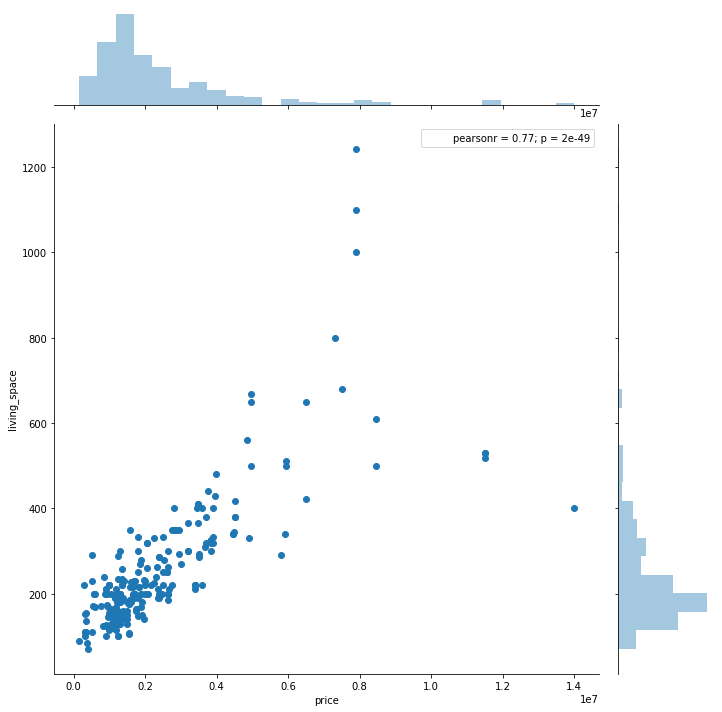

In [6]:
sns.jointplot(x="price", y="living_space", data=df, size=10)

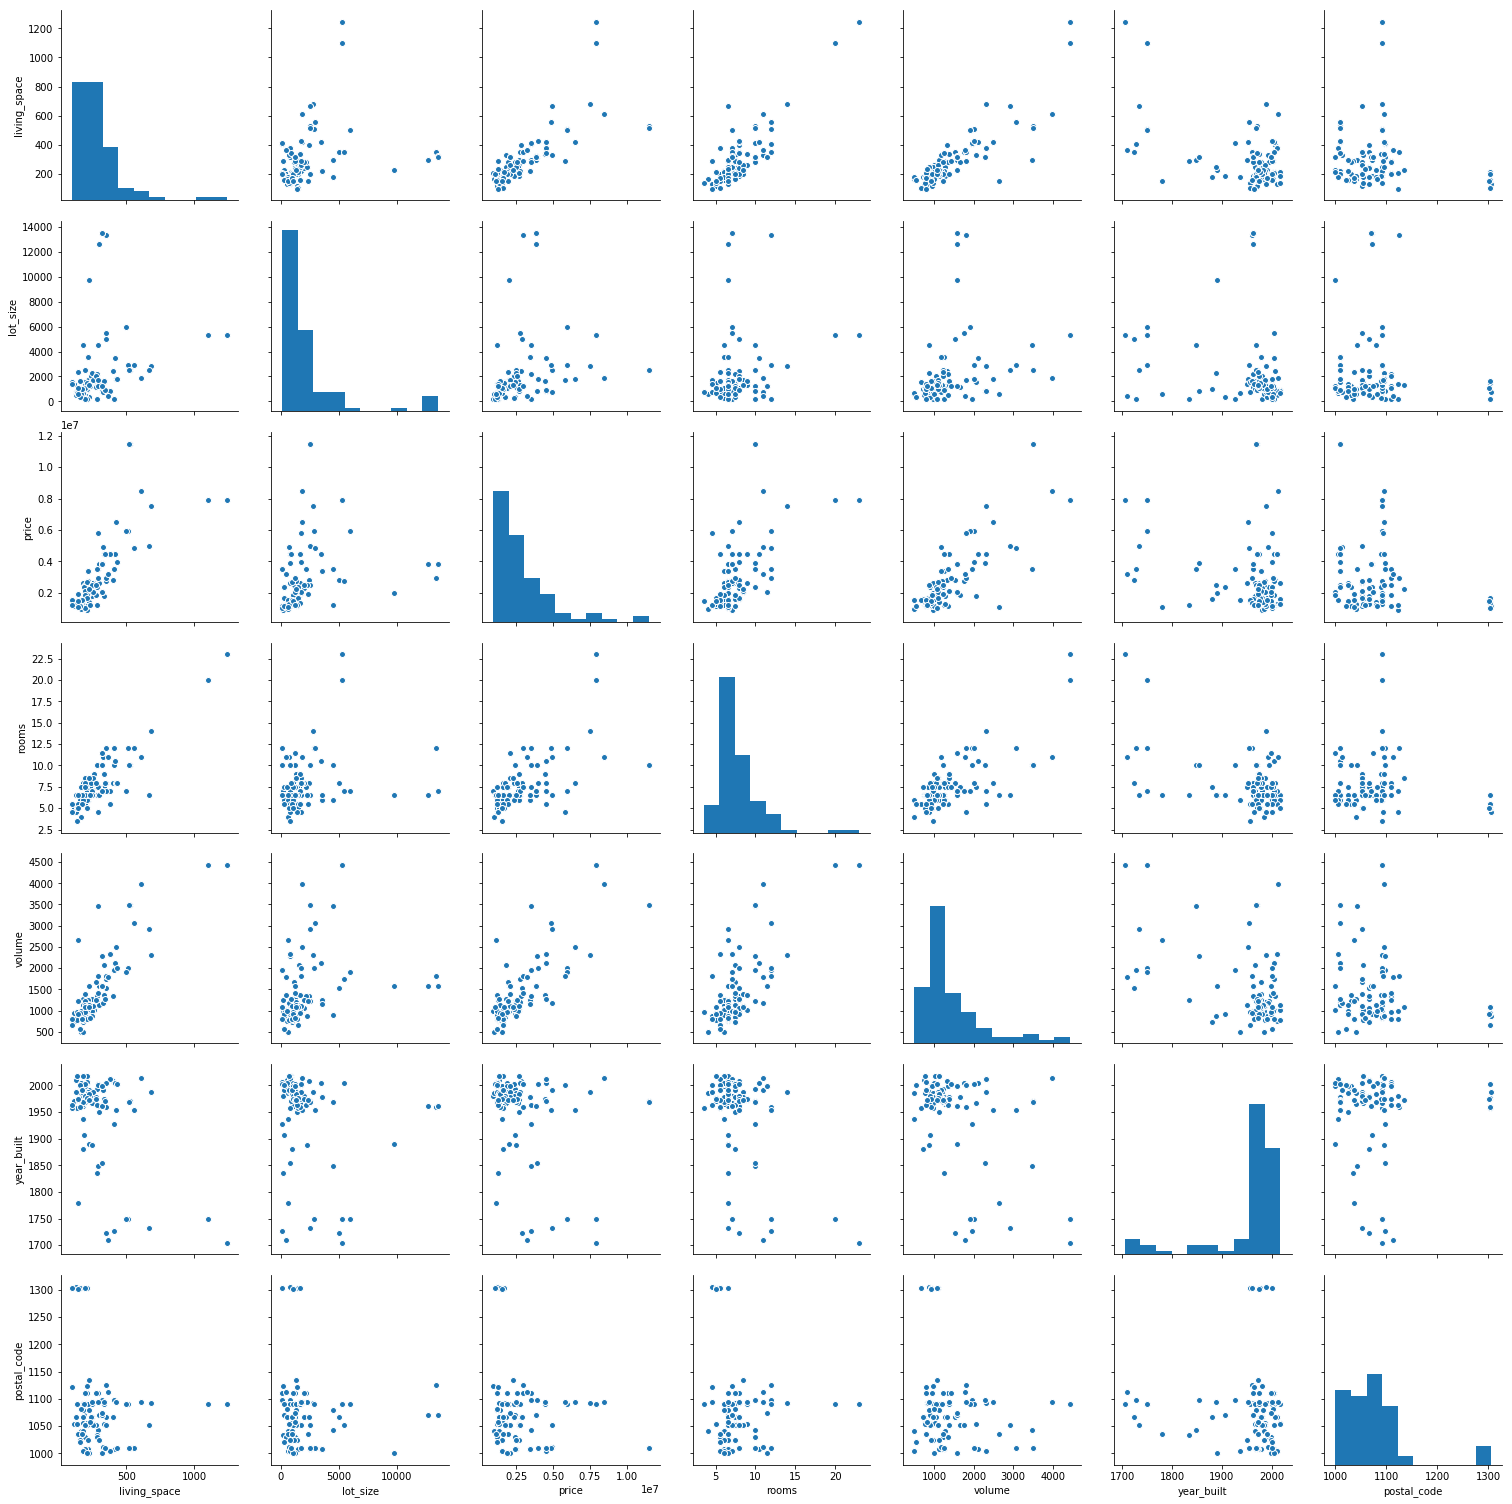

In [7]:
sns.pairplot(df.dropna(), size=3)

In [8]:
df.commune.value_counts()

Lausanne                  19
Grandvaux                 17
Lutry                     15
Epalinges                 15
Le Mont-sur-Lausanne      12
Penthaz                   10
EVIAN LES BAINS            9
Belmont-sur-Lausanne       9
Pully                      8
Bussigny                   7
Chexbres                   7
Jouxtens-Mézery            6
Morges                     6
Ecublens VD                6
Echallens                  6
Sullens                    5
St-Saphorin-sur-Morges     5
Epesses                    4
Aran                       3
La Croix (Lutry)           3
Savigny                    3
Romanel-sur-Morges         3
PUBLIER                    3
Les Cullayes               3
Cossonay-Ville             3
NEUVECELLE                 2
Cugy VD                    2
Froideville                2
Echichens                  2
Puidoux                    2
                          ..
Crissier                   2
Morrens VD                 2
LUGRIN                     2
SAINT PAUL EN 

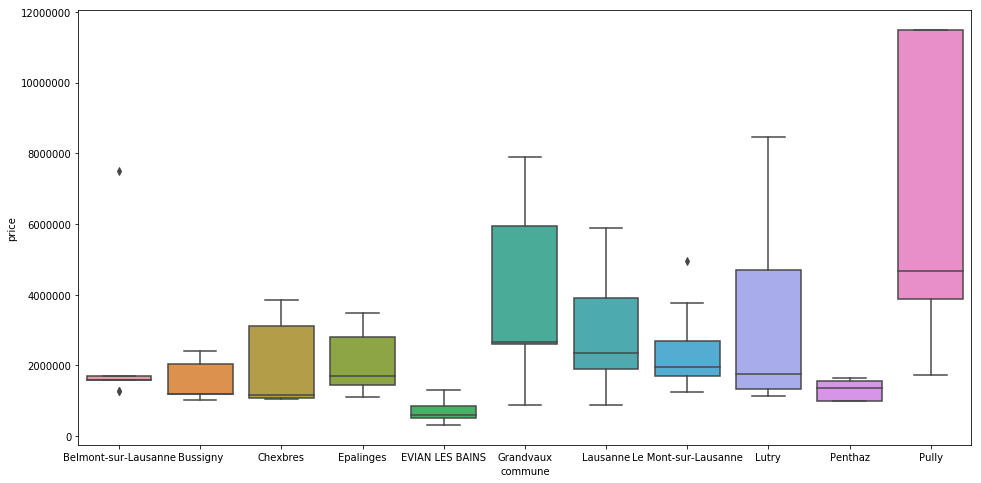

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.get_yaxis().get_major_formatter().set_scientific(False)
communes_in_scope = df.commune.value_counts()>6
sns.boxplot(x="commune", y="price", data=df[communes_in_scope[df.commune].values], ax=ax)